In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20000) 

%matplotlib inline

In [1]:
import pip

try:
    from pip._internal import main as pip_main
except:
    from pip import main as pip_main
    
pip_main(['install', "hyperopt ", "--user"]) 

0

In [71]:
def register_pandas_sql():
    import pandasql as ps
    from IPython.core import magic_arguments
    from IPython.core.magic import register_line_cell_magic
    from IPython.display import display
    
    @register_line_cell_magic 
    def pd_sql(line='', cell=None):
        if cell is None:
            cell = line
        
        cell = " ".join([l for l in cell.split("\n")])        

        ip = get_ipython()
        ip.run_cell("""ps.sqldf('{cell}', locals())""".format(cell=cell))
        
        
register_pandas_sql()

In [73]:
%%pd_sql 

SELECT *
FROM data
LIMIT 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


Каждая строчка наборов данных содержит следующие поля:

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [70]:
data = pd.read_csv('../data/titanic_train.csv',
                  index_col='PassengerId')

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


1. Сколько мужчин / женщин находилось на борту?

412 мужчин и 479 женщин
314 мужчин и 577 женщин
479 мужчин и 412 женщин
577 мужчин и 314 женщин

In [74]:
%%pd_sql 

SELECT Sex, COUNT(*)
FROM data
GROUP BY Sex

,Sex,COUNT(*)
0,female,314
1,male,577


In [75]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

104
108
112
125

In [78]:
pd.crosstab(data["Pclass"], data["Sex"], margins = True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

Медиана – 14.45, стандартное отклонение – 49.69
Медиана – 15.1, стандартное отклонение – 12.15
Медиана – 13.15, стандартное отклонение – 35.3
Медиана – 17.43, стандартное отклонение – 39.1

In [81]:
(round(data["Fare"].median(), 2), round(data["Fare"].std(),2))

(14.45, 49.69)

4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

22.7% среди молодых и 40.6% среди старых
40.6% среди молодых и 22.7% среди старых
35.3% среди молодых и 27.4% среди старых
27.4% среди молодых и 35.3% среди старых

In [93]:
def age_bukcet(age):
    if age < 30:
        return 1
    elif age >= 30 and age <= 60:
        return 2
    elif age > 60:
        return 3

In [94]:
data["Age_bucket"] = data["Age"].apply(age_bukcet)

In [95]:
pd.crosstab(data["Age_bucket"], data["Survived"], normalize='index')

Survived,0,1
Age_bucket,,
1.0,0.593750,0.406250
2.0,0.581169,0.418831
3.0,0.772727,0.227273


In [106]:
%%pd_sql 

SELECT Age_bucket, (CAST(SUM(Survived)AS REAL)/COUNT(*))*100 AS Dolya
FROM (
    SELECT Survived,  
        CASE 
            WHEN Age < 30 THEN 1
            WHEN Age >= 30 AND Age <= 60 THEN 2
            WHEN Age > 60 THEN 3
        END AS Age_bucket
    FROM data
    ) 
GROUP BY Age_bucket



,Age_bucket,Dolya
0,NaN,29.378531
1,1.0,40.625000
2,2.0,41.883117
3,3.0,22.727273


5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

30.2% среди мужчин и 46.2% среди женщин
35.7% среди мужчин и 74.2% среди женщин
21.1% среди мужчин и 46.2% среди женщин
18.9% среди мужчин и 74.2% среди женщин

In [107]:
pd.crosstab(data["Sex"], data["Survived"], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?

Charles
Thomas
William
John

In [108]:
data["First_name"] = data["Name"].apply(lambda x: x.split(",")[0])

In [116]:
%%pd_sql 

SELECT First_name, COUNT(*)
FROM data
WHERE Sex = "male"
GROUP BY First_name
ORDER BY COUNT(*) DESC
LIMIT 10

,First_name,COUNT(*)
0,Panula,5
1,Goodwin,4
2,Gustafsson,4
3,Johnson,4
4,Rice,4
5,Sage,4
6,Williams,4
7,Andersson,3
8,Carter,3
9,Davies,3


In [123]:
data[data["Sex"] == "male"] \
.groupby('First_name') \
.count() \
.sort_values(by='Name', ascending = False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bucket
First_name,,,,,,,,,,,,
Panula,5,5,5,5,5,5,5,5,5,0,5,5
Gustafsson,4,4,4,4,4,4,4,4,4,0,4,4
Goodwin,4,4,4,4,4,4,4,4,4,0,4,4
Johnson,4,4,4,4,4,4,4,4,4,0,4,4
Sage,4,4,4,4,0,4,4,4,4,0,4,0


7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

Да
Нет

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96cb299210>,
      dtype=object)

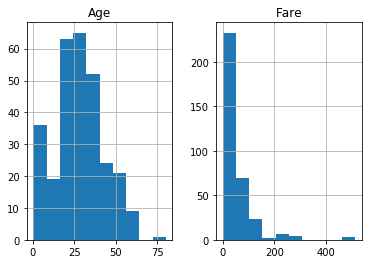

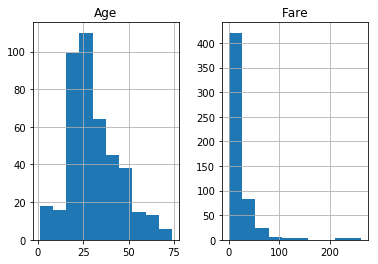

In [129]:
data[data["Survived"] == 1][["Age", "Fare"]].hist()
data[data["Survived"] == 0][["Age", "Fare"]].hist()

8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

В среднем мужчины 1-го класса старше 40 лет
В среднем женщины 1-го класса старше 40 лет
Мужчины всех классов в среднем старше женщин того же класса
В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [136]:
pd.crosstab(data["Sex"],data["Pclass"], 
            values=data["Age"],
            aggfunc=np.mean)


Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


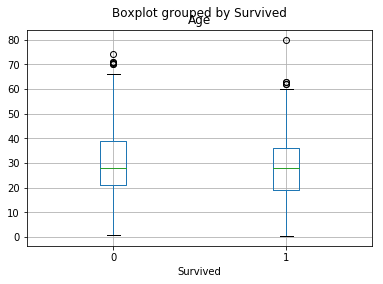

In [140]:
import matplotlib.pyplot as plt

data.boxplot(column='Age', by='Survived')
plt.show()

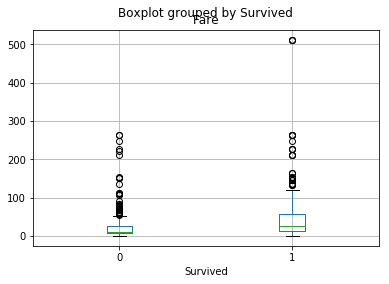

In [141]:
data.boxplot(column='Fare', by='Survived')
plt.show()